In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import imageio
import glob

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

T SNE



In [3]:
df = pd.read_csv('data/styles.csv', error_bad_lines=False)

In [4]:
#df.set_index('id', inplace=True)

In [5]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [34]:
df.index

RangeIndex(start=0, stop=44446, step=1)

In [35]:
all_img = []
for i, ix in enumerate( df.id ):
    if i%1000==0:
        print(i, len(df))
    
    fn = r'/Users/Kelly/galvanize/week8/data/images/{}.jpg'.format(ix)
    try:
        img = imageio.imread(fn)
        if img.shape!=(80, 60, 3):
            all_img.append( [0]*(60*80*3) )
        else:
            all_img.append( img.ravel() )
    except FileNotFoundError:
        all_img.append( [0]*(60*80*3) )
        
    

0 44446
1000 44446
2000 44446
3000 44446
4000 44446
5000 44446
6000 44446
7000 44446
8000 44446
9000 44446
10000 44446
11000 44446
12000 44446
13000 44446
14000 44446
15000 44446
16000 44446
17000 44446
18000 44446
19000 44446
20000 44446
21000 44446
22000 44446
23000 44446
24000 44446
25000 44446
26000 44446
27000 44446
28000 44446
29000 44446
30000 44446
31000 44446
32000 44446
33000 44446
34000 44446
35000 44446
36000 44446
37000 44446
38000 44446
39000 44446
40000 44446
41000 44446
42000 44446
43000 44446
44000 44446


In [36]:
all_img = np.stack(all_img)

In [37]:
bw_img = all_img.reshape(-1, 80, 60, 3).mean(3).reshape(-1, 80*60)

In [38]:
all_img[0]

array([255, 255, 255, ..., 255, 255, 251])

In [39]:
all_img.shape

(44446, 14400)

In [40]:
df.shape

(44446, 10)

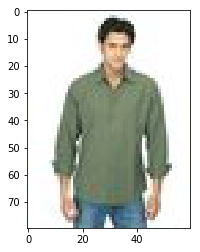

In [41]:
plt.imshow( all_img[6].reshape(80,60,3)/255 )

In [42]:
df['masterCategory'].value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [43]:
df['gender'].value_counts()

Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: gender, dtype: int64

In [44]:
df[df['masterCategory']=='Apparel'].groupby('subCategory').count()['masterCategory']

subCategory
Apparel Set                   106
Bottomwear                   2694
Dress                         478
Innerwear                    1808
Loungewear and Nightwear      470
Saree                         427
Socks                          12
Topwear                     15405
Name: masterCategory, dtype: int64

In [45]:
df[df['masterCategory']=='Accessories'].groupby('subCategory').count()['masterCategory']

subCategory
Accessories            143
Bags                  3055
Belts                  811
Cufflinks              108
Eyewear               1073
Gloves                  20
Headwear               293
Jewellery             1080
Mufflers                38
Perfumes                 1
Scarves                118
Shoe Accessories        24
Socks                  686
Sports Accessories       3
Stoles                  90
Ties                   258
Umbrellas                6
Wallets                933
Watches               2542
Water Bottle             7
Name: masterCategory, dtype: int64

In [46]:
df[df['masterCategory']=='Accessories'].groupby('subCategory').count()['masterCategory'].index

Index(['Accessories', 'Bags', 'Belts', 'Cufflinks', 'Eyewear', 'Gloves',
       'Headwear', 'Jewellery', 'Mufflers', 'Perfumes', 'Scarves',
       'Shoe Accessories', 'Socks', 'Sports Accessories', 'Stoles', 'Ties',
       'Umbrellas', 'Wallets', 'Watches', 'Water Bottle'],
      dtype='object', name='subCategory')

In [47]:
acc_sub_colors = {'Accessories':'orange', 'Bags':'#BA55D3', 'Belts':'purple', 'Cufflinks':'green', 'Eyewear':'#8B0000', 'Gloves':'orange',
       'Headwear':'cyan', 'Jewellery':'#008B8B', 'Mufflers':'orange', 'Perfumes':'orange', 'Scarves':'blue',
       'Shoe Accessories':'orange', 'Socks':'blue', 'Sports Accessories':'orange', 'Stoles':'orange', 'Ties':'blue',
       'Umbrellas':'orange', 'Wallets':'#F08080', 'Watches':'#808080', 'Water Bottle':'orange'}

In [48]:
df['subCategory'].value_counts().index

Index(['Topwear', 'Shoes', 'Bags', 'Bottomwear', 'Watches', 'Innerwear',
       'Jewellery', 'Eyewear', 'Fragrance', 'Sandal', 'Wallets', 'Flip Flops',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Cufflinks', 'Apparel Set', 'Free Gifts', 'Stoles', 'Skin Care', 'Skin',
       'Eyes', 'Mufflers', 'Shoe Accessories', 'Sports Equipment', 'Gloves',
       'Hair', 'Bath and Body', 'Water Bottle', 'Umbrellas', 'Perfumes',
       'Beauty Accessories', 'Wristbands', 'Sports Accessories', 'Vouchers',
       'Home Furnishing'],
      dtype='object')

In [49]:
df[df['masterCategory']=='Footwear'].groupby('subCategory').count()['masterCategory']

subCategory
Flip Flops     915
Sandal         963
Shoes         7344
Name: masterCategory, dtype: int64

In [50]:
df[df['masterCategory']=='Apparel'].groupby(['subCategory','articleType']).count()['masterCategory']

subCategory               articleType       
Apparel Set               Clothing Set             8
                          Kurta Sets              94
                          Swimwear                 4
Bottomwear                Capris                 175
                          Churidar                30
                          Jeans                  609
                          Jeggings                34
                          Leggings               177
                          Patiala                 38
                          Rain Trousers            2
                          Salwar                  32
                          Salwar and Dupatta       7
                          Shorts                 545
                          Skirts                 128
                          Stockings               32
                          Swimwear                13
                          Tights                   9
                          Track Pants            304
 

In [51]:
wearable_list = ['Apparel', 'Accessories', 'Footwear']

In [52]:
wearable_df = df[ df['masterCategory'].isin(wearable_list) ]
wearable_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [53]:
wearable_img = all_img[ wearable_df.index.values ].copy()

In [54]:
wearable_df.index.values.shape 

(41911,)

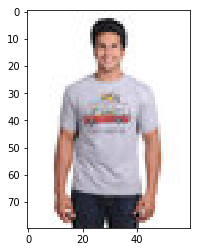

In [55]:
plt.imshow( wearable_img[5].reshape(80,60,3)/255 )

In [57]:
bw_wearables = wearable_img.reshape(-1, 80, 60, 3).mean(3).reshape(-1, 80*60)

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)
bw_wearables_pca = pca.fit_transform(bw_wearables[0:10000])

In [60]:
wearables_pca = pca.fit_transform(wearable_img[0:10000])

In [61]:
wearables_pca.shape

(10000, 2)

In [62]:
masterCat_colors = {'Apparel':'orange','Accessories':'teal','Footwear':'red', 'Personal Care':'grey', 'Free Items':'yellow', 'Sporting Goods':'black', 'Home':'magenta'}
wearable_df['colors'] = wearable_df['masterCategory'].apply(lambda x: masterCat_colors[x])

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, cophenet
#from scipy.spatial.distance import dist

In [90]:
leaves_list(Z)[2995:3001]

array([2888,  911, 1668,   15, 1146], dtype=int32)

In [109]:
Z = linkage(bw_wearables[0:3000], 'complete')

In [160]:
Z_idx = wearable_df[0:3000].index
Z_idx

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3183, 3184, 3185, 3187, 3188, 3189, 3190, 3191, 3192, 3193],
           dtype='int64', length=3000)

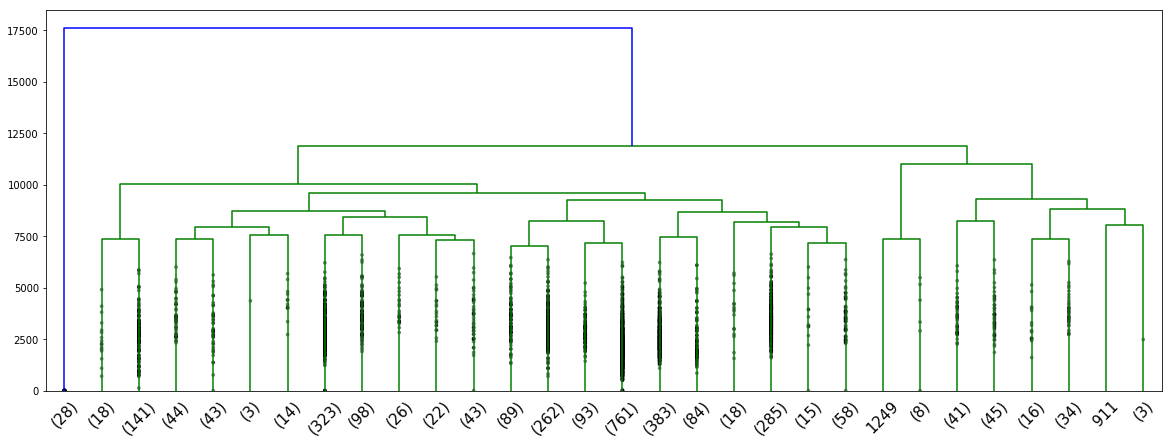

In [168]:
plt.figure(figsize=(20,7))
den = dendrogram(Z, truncate_mode='lastp', p=30, 
           leaf_rotation=45, leaf_font_size=15, 
           show_contracted=True, show_leaf_counts=True)

In [125]:
sizes = np.concatenate([np.ones(Z.shape[0]+1), Z[:,3]]).astype(int)
count_leaves = sizes[den['leaves']]

In [131]:
count_leaves

array([ 28,  18, 141,  44,  43,   3,  14, 323,  98,  26,  22,  43,  89,
       262,  93, 761, 383,  84,  18, 285,  15,  58,   1,   8,  41,  45,
        16,  34,   1,   3])

In [170]:
leaf_groups = []
for i in range(len(count_leaves)):
    start = 0
    if i!=0:
        start += count_leaves[i-1]
    end = start + count_leaves[i] 
    each_list = list(leaves_list(Z))[start:end]
    leaf_groups.append(each_list)
    #print(start, end)

In [169]:
len(leaf_groups)

30

In [149]:
# test = []
# for i in leaf_groups:
#     test.append(len(i))

In [166]:
leaf_categories_by_group = []
for g in leaf_groups:
    g_cat_list = []
    for each in g: 
        g_cat_list.append(wearable_df.loc[Z_idx[each], 'masterCategory'])
    leaf_categories_by_group.append(g_cat_list)

In [267]:
leaf_sub_categories_by_group = []
for g in leaf_groups:
    g_cat_list = []
    for each in g: 
        g_cat_list.append(wearable_df.loc[Z_idx[each], 'subCategory'])
    leaf_sub_categories_by_group.append(g_cat_list)
#leaf_sub_categories_by_group

[['Topwear',
  'Watches',
  'Shoes',
  'Watches',
  'Watches',
  'Bags',
  'Bags',
  'Bags',
  'Innerwear',
  'Eyewear',
  'Flip Flops',
  'Innerwear',
  'Watches',
  'Wallets',
  'Wallets',
  'Watches',
  'Topwear',
  'Watches',
  'Watches',
  'Bags',
  'Shoes',
  'Bags',
  'Sandal',
  'Shoes',
  'Innerwear',
  'Wallets',
  'Watches',
  'Bags'],
 ['Bags',
  'Bags',
  'Innerwear',
  'Innerwear',
  'Innerwear',
  'Bags',
  'Bags',
  'Wallets',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Wallets',
  'Wallets'],
 ['Watches',
  'Bags',
  'Shoes',
  'Bags',
  'Sandal',
  'Shoes',
  'Innerwear',
  'Wallets',
  'Watches',
  'Bags',
  'Bags',
  'Bags',
  'Innerwear',
  'Innerwear',
  'Innerwear',
  'Bags',
  'Bags',
  'Wallets',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Bags',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wallets',
  'Wall

In [207]:
num_g = len(leaf_groups)
leaf_categories_by_group[0].count('Apparel')

5

In [304]:
#fig, ax = plt.subplots(figsize=(20,7))
app_list = []
acc_list = []
shoe_list = []
for g in range(len(leaf_groups)):
    app = leaf_categories_by_group[g].count('Apparel')
    app_list.append(app)
    acc = leaf_categories_by_group[g].count('Accessories')
    acc_list.append(acc)
    shoe = leaf_categories_by_group[g].count('Footwear')
    shoe_list.append(shoe)

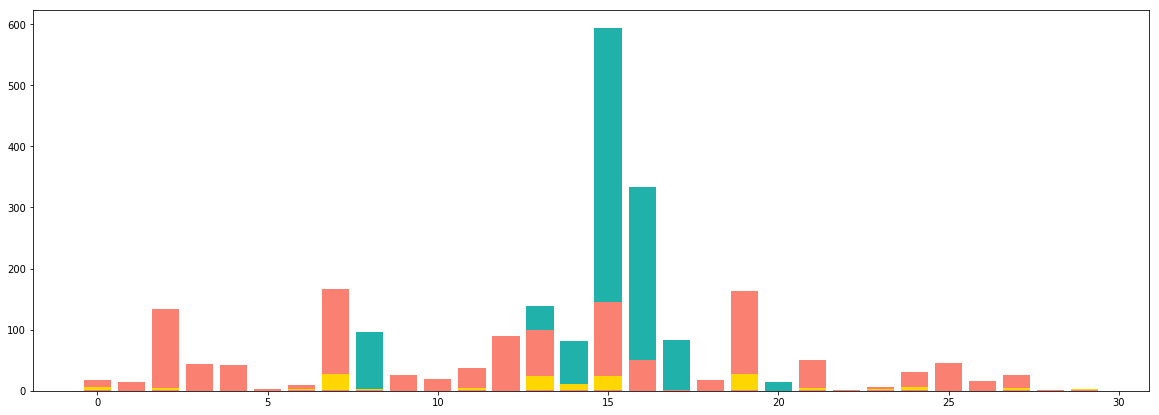

In [305]:
fig, ax = plt.subplots(figsize=(20,7))
#plt.gca().invert_xaxis()
#ax.xticks()
p1 = ax.bar(np.arange(num_g), app_list, color= "#20B2AA")
p2 = ax.bar(np.arange(num_g), acc_list, bottom=app, color = "#FA8072")
p3 = ax.bar(np.arange(num_g), shoe_list, bottom=acc, color= "#FFD700")

In [321]:
def make_category_count_list(cat):
    cat_list = []
    for g in range(len(leaf_groups)):
        cat_count = leaf_sub_categories_by_group[g].count(cat)
        cat_list.append(cat_count)
    return cat_list

In [ ]:
subCat = ['Topwear', 'Shoes', 'Bags', 'Bottomwear', 'Watches', 'Innerwear',
       'Jewellery', 'Eyewear', 'Fragrance', 'Sandal', 'Wallets', 'Flip Flops',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Cufflinks', 'Apparel Set', 'Free Gifts', 'Stoles', 'Skin Care', 'Skin',
       'Eyes', 'Mufflers', 'Shoe Accessories', 'Sports Equipment', 'Gloves',
       'Hair', 'Bath and Body', 'Water Bottle', 'Umbrellas', 'Perfumes',
       'Beauty Accessories', 'Wristbands', 'Sports Accessories', 'Vouchers',
       'Home Furnishing']

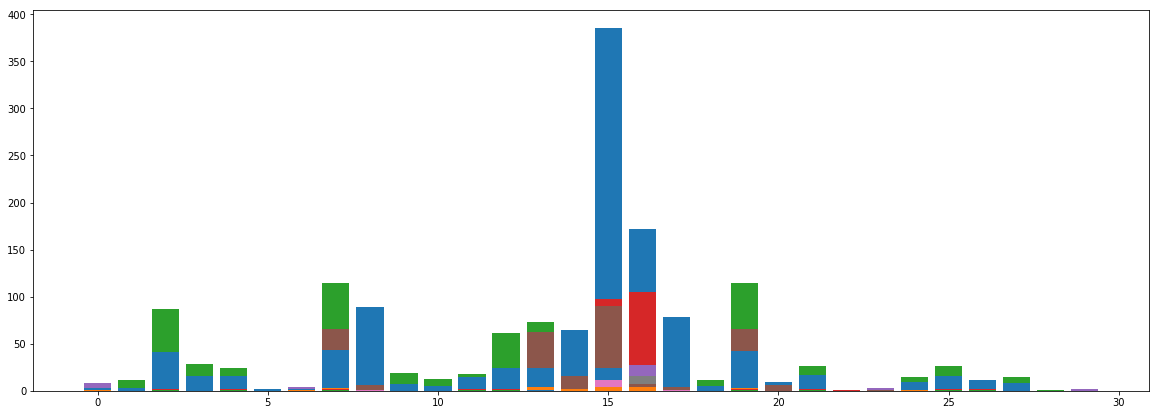

In [297]:
fig, ax = plt.subplots(figsize=(20,7))
for i in range(len(subCat)):
    ax.bar(np.arange(num_g), make_category_count_list(subCat[i]))

In [320]:
subCat_app = ['Apparel Set', 'Bottomwear', 'Dress', 'Innerwear',
       'Loungewear and Nightwear', 'Saree', 'Socks', 'Topwear']
subCat_acc = ['Accessories', 'Bags', 'Belts', 'Cufflinks', 'Eyewear', 'Gloves',
       'Headwear', 'Jewellery', 'Mufflers', 'Perfumes', 'Scarves',
       'Shoe Accessories', 'Socks', 'Sports Accessories', 'Stoles', 'Ties',
       'Umbrellas', 'Wallets', 'Watches', 'Water Bottle']
subCat_footwear = ['Flip Flops', 'Sandal', 'Shoes']
subCat_personal =['Bath and Body', 'Beauty Accessories', 'Eyes', 'Fragrance', 'Hair',
       'Lips', 'Makeup', 'Nails', 'Perfumes', 'Skin', 'Skin Care']
subCat_sport = ['Sports Equipment', 'Wristbands']
subCat_free = ['Free Gifts', 'Vouchers']

Apparel

In [322]:
subCat_app_count = []
for x in subCat_app:
    zzz = make_category_count_list(x)
    subCat_app_count.append(zzz)
subCat_app_count

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  3,
  1,
  98,
  105,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  5,
  13,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [3,
  3,
  4,
  0,
  0,
  0,
  2,
  66,
  6,
  0,
  3,
  4,
  0,
  62,
  16,
  90,
  6,
  4,
  0,
  66,
  6,
  4,
  0,
  1,
  6,
  0,
  0,
  4,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  11,
  14,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  16,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  2,
  0,
  2,
  0,
  0,
  2,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  2,
  

In [318]:
not_apparel = count_leaves - app_list

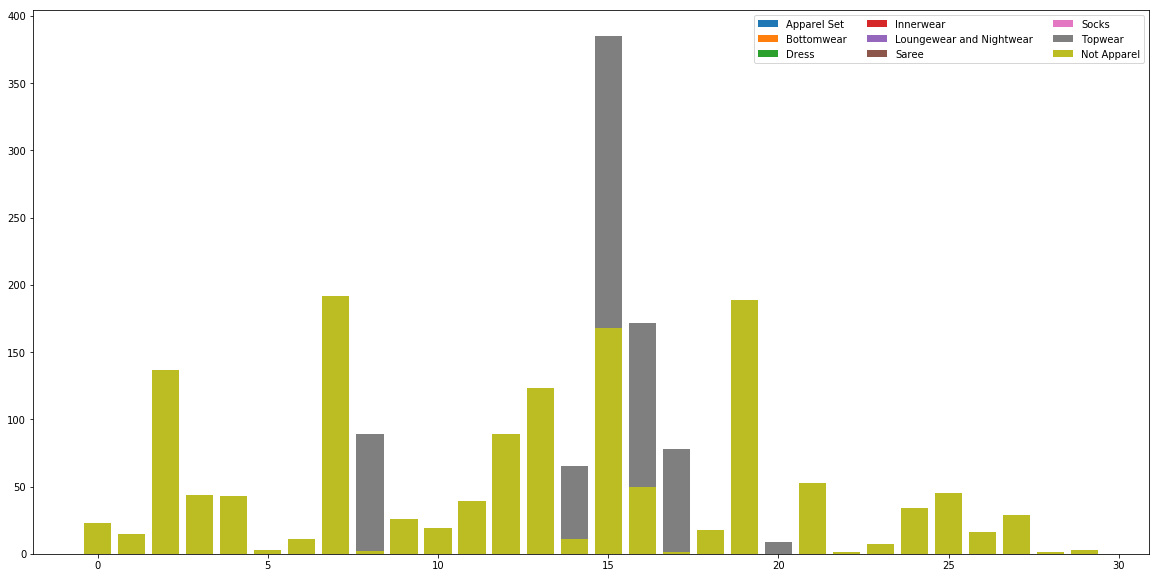

In [326]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(np.arange(num_g), not_apparel)

for i in range(len(subCat_app)):
    ax.bar(np.arange(num_g), make_category_count_list(subCat_app[i]), label = subCat_app[i])
plt.bar(np.arange(num_g), not_apparel, label = 'Not Apparel')
plt.legend(ncol = 3)
#p2 = ax.bar(np.arange(num_g), acc_list, bottom=app, color = "#FA8072")
#p3 = ax.bar(np.arange(num_g), shoe_list, bottom=acc, color= "#FFD700")

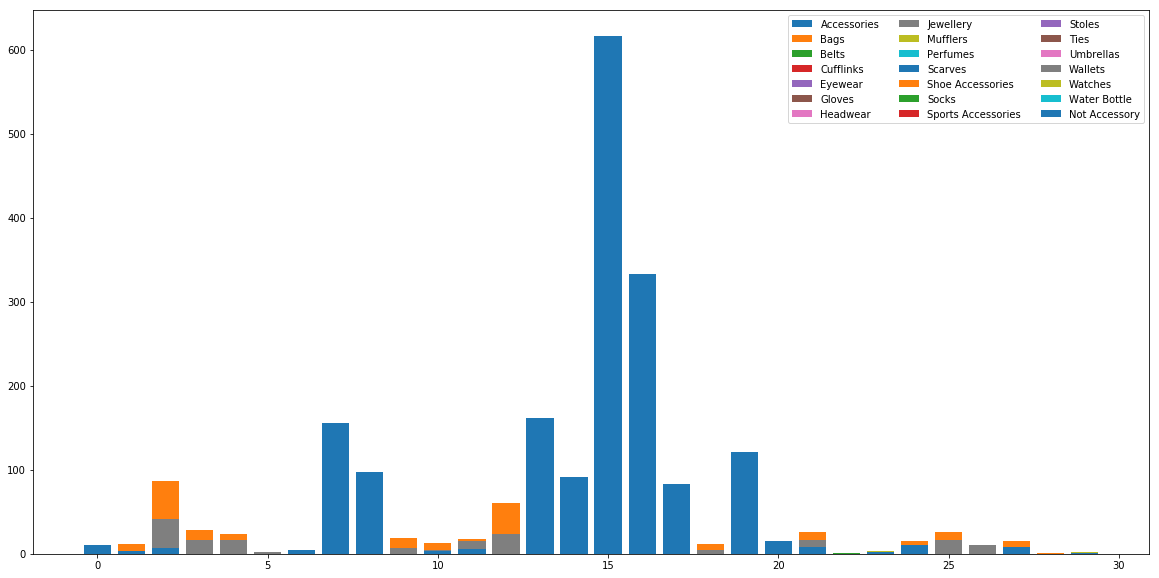

In [327]:
not_accessory = count_leaves - acc_list
fig, ax = plt.subplots(figsize=(20,10))


for i in range(len(subCat_acc)):
    ax.bar(np.arange(num_g), make_category_count_list(subCat_acc[i]), label = subCat_acc[i])
plt.bar(np.arange(num_g), not_accessory, label = 'Not Accessory')
plt.legend(ncol = 3)
#p2 = ax.bar(np.arange(num_g), acc_list, bottom=app, color = "#FA8072")
#p3 = ax.bar(np.arange(num_g), shoe_list, bottom=acc, color= "#FFD700")

In [ ]:
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

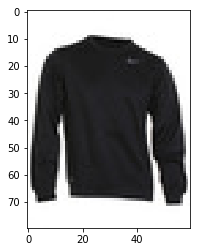

In [84]:
plt.imshow( wearable_img[911].reshape(80,60,3)/255 )

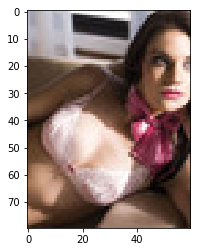

In [85]:
plt.imshow( wearable_img[1249].reshape(80,60,3)/255 )

In [118]:
Z2 = linkage(wear_pics[0:3000], 'ward')

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [65.0, 65.0, 91.25, 91.25],
  [55.0, 55.0, 78.125, 78.125],
  [26.25, 26.25, 66.5625, 66.5625]],
 'dcoord': [[0.0, 57896.95806492854, 57896.95806492854, 0.0],
  [0.0, 72229.05998878936, 72229.05998878936, 57896.95806492854],
  [0.0, 104771.8397594494, 104771.8397594494, 0.0],
  [72229.05998878936,
   114163.51576558308,
   114163.51576558308,
   104771.8397594494],
  [0.0, 61055.728619963316, 61055.728619963316, 0.0],
  [0.0, 80175.62843942312, 80175.62843942312, 0.0],
  [0.0, 83870.45764179341, 83870.45764179341, 80175.62843942312],
  [61055.728619963316,
   108635.61319071666,
   108635.61319071666,
   83870.45764179341],
  [0.0, 124248.71005286061, 124248.71005286061, 108635.61319071666],
  [0.0, 192031.05537051935, 192031.05537051935, 124248.71

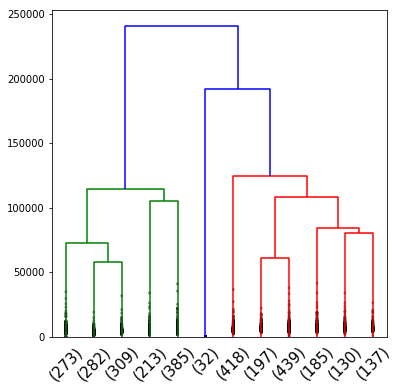

In [120]:
plt.figure(figsize=(6,6))
dendrogram(Z2, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)

In [140]:
W = fclusterdata(Z2, t=1)

In [142]:
W.shape

(2999,)

In [145]:
import seaborn as sns
from time import time
from sklearn.manifold import TSNE
%matplotlib inline

In [180]:
XX = TSNE(n_components=2, n_iter=1000, perplexity=100).fit_transform(pic_df[0:1000])

In [166]:
XX.shape

(1000, 2)

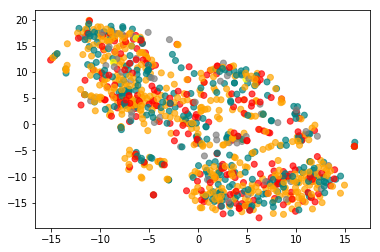

In [183]:
plt.scatter(XX[:,0],XX[:,1], color=df.colors[0:1000], alpha=.7)

In [160]:
df[0:1000]['masterCategory'].value_counts()

Apparel          45
Accessories      27
Footwear         23
Personal Care     5
Name: masterCategory, dtype: int64

In [163]:
colors = {'Apparel':'orange','Accessories':'teal','Footwear':'red', 'Personal Care':'grey', 'Free Items':'yellow', 'Sporting Goods':'black', 'Home':'magenta'}
df['colors'] = df['masterCategory'].apply(lambda x: colors[x])

In [ ]:
Apparel
Accessories
Footwear
Personal Care
Free Items
Sporting Goods
Home

In [ ]:
{'dark cyan':'#008B8B', 'grey':'#808080', "medium_turquoise":'#BA55D3', 'coral':'#F08080', 'dark red':'#8B0000', 'dark orange':'#FF8C00', 'light orange':'#F4A460'}